# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [32]:
# Initial imports
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()

True

In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient

news_api = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Fetch the Bitcoin news articles
btc_articles = news_api.get_everything(q="bitcoin", language="en")

In [5]:
# Fetch the Ethereum news articles
eth_articles = news_api.get_everything( q="ethereum", language="en")

In [7]:
# function that runs sentiment analysis and returns the dataframe of the result
def sentiment_analysis_df(articles):
    
    sentiments=[]
    for article in articles:
        try:
            date = article["publishedAt"][:25]
            text = article["content"]

            sentiment = analyzer.polarity_scores(text)

            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "date": date,
                "text": text,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu})

        except AttributeError:
            pass
    
    return pd.DataFrame(sentiments)

# Create the Bitcoin sentiment scores DataFrame
btc_df=sentiment_analysis_df(btc_articles["articles"])
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-06T11:00:00Z,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-08-23T13:49:45Z,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
2,2021-08-10T00:34:05Z,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-19T20:00:00Z,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847
4,2021-08-23T10:14:07Z,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_df=sentiment_analysis_df(eth_articles["articles"])
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-29T18:27:16Z,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
1,2021-08-05T13:22:07Z,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
2,2021-08-23T13:49:45Z,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
3,2021-08-10T21:06:43Z,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861
4,2021-08-23T10:14:07Z,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.162885,0.071100,0.033500,0.895400
std,0.447308,0.065972,0.068998,0.071897
min,-0.886000,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.846000
50%,0.138950,0.066500,0.000000,0.904500
75%,0.525925,0.108250,0.043000,0.924750
max,0.718400,0.200000,0.271000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.148395,0.055800,0.013850,0.930300
std,0.320766,0.062553,0.029745,0.060608
min,-0.440400,0.000000,0.000000,0.810000
25%,0.000000,0.000000,0.000000,0.892500
50%,0.113150,0.049000,0.000000,0.935500
75%,0.344025,0.095000,0.000000,1.000000
max,0.695600,0.190000,0.094000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BITCOIN

Q: Which coin had the highest compound score?

A: BITCOIN

Q. Which coin had the highest positive score?

A: BITCOIN

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [38]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [69]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw_list = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'char','reuters','ha'}

In [70]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw_list.union(sw_addons)]
    
    
    return tokens

In [71]:
# Create a new tokens column for Bitcoin
btc_df["tokens"]= btc_df["text"].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06T11:00:00Z,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-08-23T13:49:45Z,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
2,2021-08-10T00:34:05Z,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedlegetty, images, twitter, squ..."
3,2021-08-19T20:00:00Z,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,"[retailers, increasingly, accepting, cryptocur..."
4,2021-08-23T10:14:07Z,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


In [72]:
# Create a new tokens column for Ethereum
eth_df["tokens"]= eth_df["text"].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-29T18:27:16Z,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
1,2021-08-05T13:22:07Z,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, wa, founded, adfree, creator, network, ..."
2,2021-08-23T13:49:45Z,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
3,2021-08-10T21:06:43Z,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861,"[bell, today, coinbase, reported, another, per..."
4,2021-08-23T10:14:07Z,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [73]:
from collections import Counter
from nltk import ngrams

In [74]:
# Generate the Bitcoin N-grams where N=2
btc_tokens=np.concatenate(btc_df["tokens"].to_numpy())
btc_bigrams= Counter(ngrams(btc_tokens, n=2))
btc_bigrams.most_common(10)

[(('buy', 'hold'), 3),
 (('hold', 'sell'), 3),
 (('paypal', 'allow'), 2),
 (('allow', 'user'), 2),
 (('first', 'time'), 2),
 (('allow', 'customer'), 2),
 (('sell', 'cryptocurrencies'), 2),
 (('joe', 'tidycyber'), 2),
 (('tidycyber', 'reporter'), 2),
 (('roughly', 'million'), 2)]

In [75]:
# Generate the Ethereum N-grams where N=2
eth_tokens=np.concatenate(eth_df["tokens"].to_numpy())
eth_bigrams= Counter(ngrams(eth_tokens, n=2))
eth_bigrams.most_common(10)

[(('pc', 'motherboard'), 3),
 (('ether', 'burned'), 3),
 (('buy', 'hold'), 2),
 (('hold', 'sell'), 2),
 (('reached', 'billion'), 2),
 (('reutersdado', 'ruvicillustrationnew'), 2),
 (('ruvicillustrationnew', 'york'), 2),
 (('cryptocurrency', 'heist'), 2),
 (('bitcoin', 'ethereum'), 2),
 (('ethereum', 'placed'), 2)]

In [76]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [77]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, N=10)

[('cryptocurrency', 10),
 ('first', 8),
 ('bitcoin', 8),
 ('customer', 5),
 ('allow', 4),
 ('data', 4),
 ('paypal', 3),
 ('buy', 3),
 ('hold', 3),
 ('sell', 3)]

In [78]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, N=10)

[('ethereum', 14),
 ('crypto', 5),
 ('network', 5),
 ('cryptocurrency', 5),
 ('ether', 5),
 ('bitcoin', 5),
 ('blockchain', 3),
 ('user', 3),
 ('us', 3),
 ('pc', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

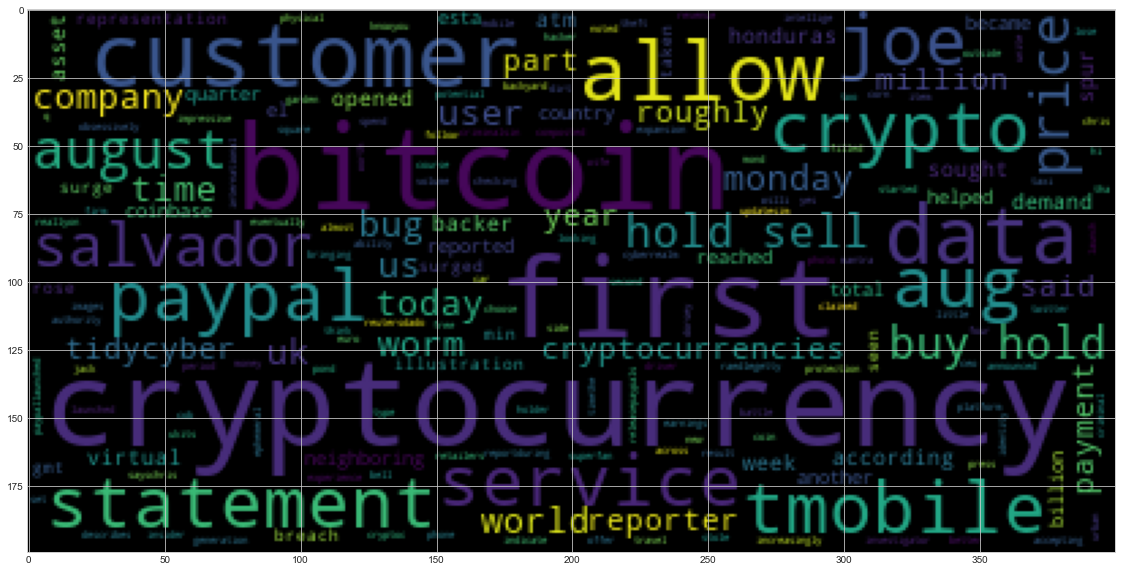

In [80]:
# Generate the Bitcoin word cloud
bit_text = " ".join(btc_tokens)
wc = WordCloud().generate(bit_text)
plt.imshow(wc)

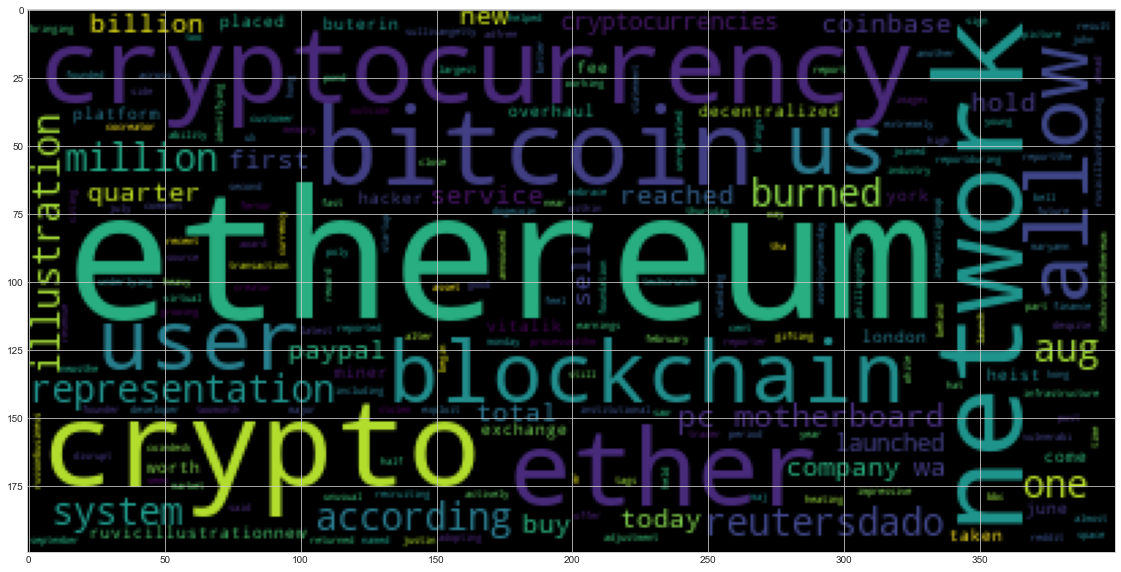

In [82]:
# Generate the Ethereum word cloud
eth_text = " ".join(eth_tokens)
wc = WordCloud().generate(eth_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---